# Lab 1- Sampling, decimation and interpolation of sequences

## Course: Discrete Time Systems

### 2º Biomedical Engineering Degree

#### Professors: Luca Martino, Óscar Barquero Pérez


## Objective 


The main objective of this lab is to understand the most simple transformations on discrete-time signals. These transformations are: sampling, decimation and interpolation.

To work through this lab, the student is going to use the following materials:

1.	Numpy and Scipy Python modules. The teacher will provide with some jupyter notebooks. 
2.	Three discrete-time signals:
    1.	A synthetic sequence generated as a linear combination of complex exponentials.
    2.	A speech signal.
    3.	An accelerometer signal from a mobile phone, from a gait experiment.
3.	The main material covered in this lab is from slide 38 onwards.

## Theory

Discrete processing (or Digital processing) is fundmantal in every Information Technology. So that, the equivalent discrete systems (slide 57, Topic 3) allows us to use Digital Electronic Systems to process continuous time signals using a discrete time system. Otherwise, these same transformations on cotinuous time signals, performed in continuous domain, would need a very complex analogical electronic circuit. The key of the digital processing is that the discrete systems, $H_d(e^{j\omega})$ can be decomposed into arithmetics operations that can be performed in a general purpose machine, that is, in a computer. This allows a great flexibility, since we can combine these discrete systems in any way we want.

In the digital worls, old physical devices are replaced by algorithms running in a computer. Every operation you are going to implemente in this lab can be performed in any digital device: mobile phones, Arduinos, Raspberry Pi, wereable devices, and of course, classical computers.

To take the most of the lab, it is adviseble to first review some concepts of topic 3. 

### Sampling of discrete-time signals
	
Sampling of discrete-time signals consits in discarding samples in the sequence periodically. Figure 1 shows a sequence $x[n]$ using Kronecker deltas. We sample this sequences with order N = 3, that is, 1 samples out of three are kept, to produce the new sequence $x_p[n]$. The wholes are filled with $0$s.

<img src="fig_1.png" alt="drawing" width="500"/>

**Question: How is the spectrum of $x_p[n]$ with respect to the $x[n]$?**



### Decimation of discrete-time signals

Decimation consits in only keep sample periodcially, without filling with 0s. Figure 2 shows an example of decimation, where the decimated signal $x_b[n]$ is constructed from the sampled signal $x_p[n]$.

<img src="fig_2.png" alt="drawing" width="500"/>


**Question:** How is the spectrum of $x_b[n]$ with respect to the $x[n]$?


### Interpolation of discrete-time signals.

Interopolation, or *upsampling*, is the reverse of decimation. The easiest way to interpolate is by insertin '0s'. So that, to perfomr an interpolation of order = L, a number of $L-1$ points with zero amplitude are intesrting between each of the values in the original signal. Then, a value between no-zero samples can be estimated using a lopass filtering, which leads to the classical sinc interpolation.

The discrete interpolation is a very useful process. It allows to recover a previously decimated signal, that if it fulfills some requiremente, it would be equivalente to have sampled the original signal in continuous time a higher sampling frequency.

<img src="fig_3.png" alt="drawing" width="400"/>
*Figure: Interpolation of a sequence. First is expanded using Kronecker deltas of amplitude 0. Then, the amplitude of these deltas are estimated using a linear combination, i.e. sinc interpolation.*


**Question: Based on the previous examples, what will be the spectrum of $x_i[n]$ with respect to $x_b[n]$? **

## 1. Laboratory




### 1.1 Synthetic signal 

#### 1.1.1 Create a synthetic signal

In this part of the lab the student is going to create a synthetic signal, which has three sinusoidal components. To create the signal the following parameters are mandatory:

 * Sampling frequency: 10 KHz
 * Length in samples: 10000 samples
 * Three sinusoidal signals with amplitudes $A_1 = 0.7$, $A_2= 1$, $A_3 = 0.5$, frequencies $f_1 = 50 Hz$, $f_2 = 2*f_1$, $f_3 = 2*f_2$, and initial phases; $\Phi_1 = \Phi_2 =\Phi_3 = 0$. The resulting signal is going to be the sum of the three individual sinusoides.
 
The student should create two numpy vectors, $t$ and $y$, representing a time vector and the resulting signal.

The cell is going to plot the signal using plot and stem.
 
   1. **Is the resulting signal continuous or discrete** --> continuous
   
   1. **What is the meaning of the sampling frequency**.

   1. **Discuss the difference between plot and stem**

[ True  True  True ...,  True  True  True]


<IPython.core.display.Javascript object>


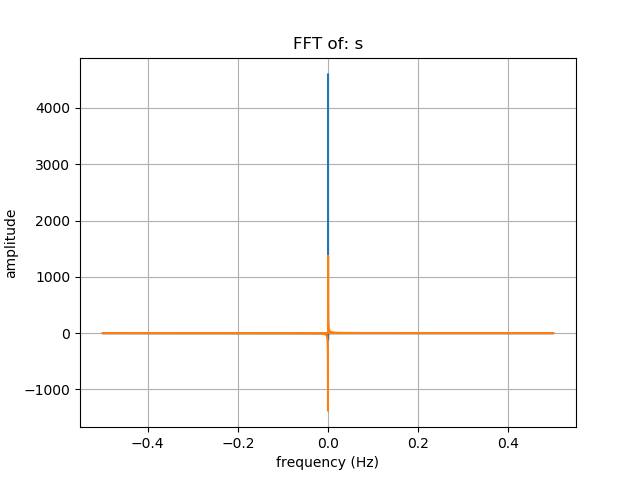

<IPython.core.display.Javascript object>


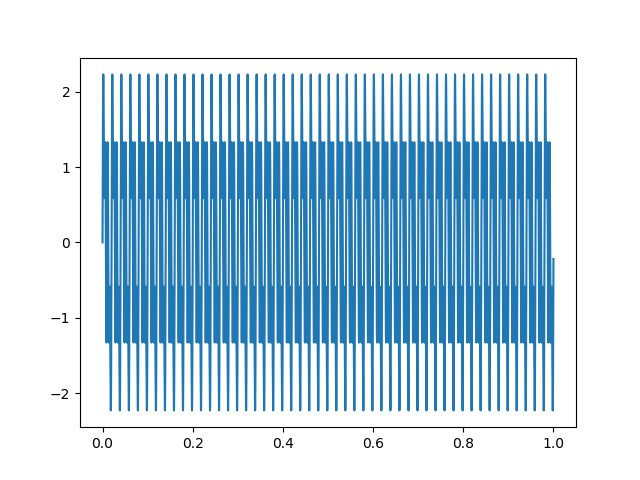

In [37]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#Parameters definition
fs = 10e3 #sampling frequency fs
T = 1/fs #sampling period T
L = 10e3 #length L in number of samples
#t = np.arange(L)*T #time vector t in secs (L values get divided by fs: note they will get 'reversed')
t = np.arange(0, L*T, T)
print(t==v)

#Signal####################
#sinusoidal amplitudes
A1 = 0.7 
A2 = 1
A3 = 0.5
#sinusoidal frequencies
f1 = 50 #Hz
f2 = 2*f1 #Hz
f3 = 2*f2 #HZ

s1 = np.sin(2*np.pi*f1*t)
s2 = np.sin(2*np.pi*f2*t)
s3 = np.sin(2*np.pi*f3*t)




s = s1 +s2 +s3
plt.title('signal: s') 
plt.ylabel('amplitude')
plt.xlabel('time')
plt.grid(True, which='both')
#plt.axhline(y=0, color='r')

#plotting signal
plt.figure(0)
plt.plot(t, s) # signal to be plot

#using stem


### 1.1.2 Spectrum of the sequence

In this section, the student is going to take the Discrete Fourier Transform to estimate the spectrum. The Discrete Fourier Transform is going to studied in Topic 4, so the student should interpret the results as if this was the Discrete-Time Fourier Transform.

Ejecute el “cell” y observe el resultado. Responda a las preguntas:  

•	¿Cuál es la diferencia entre ambos espectros?
•	¿Qué significan los picos en los espectros? ¿A qué se debe su amplitud y posición?
•	¿A qué se debe que el eje de frecuencias de la segunda gráfica esté comprendido entre -5000 y 5000 Hz? ¿Qué relación tiene con la primera gráfica?

In [38]:
#
def NextPowerOfTwo(number):
    # Returns next power of two following 'number'
    return int(np.ceil(np.log2(number)))


Lt = len(s)
print('Lt', Lt)
NFFT = 2**NextPowerOfTwo(Lt) #next power of 2 from length of y

#compute fft


sfft = np.fft.fft(s)

sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.figure(1)
plt.plot(freq, sp.real, freq, sp.imag) # sfft to be plot
plt.show()
plt.title('FFT of: s') 
plt.ylabel('amplitude')
plt.xlabel('frequency (Hz)')
plt.grid(True, which='both')

Lt 10000
t [  0.00000000e+00   1.00000000e-04   2.00000000e-04 ...,   9.99700000e-01
   9.99800000e-01   9.99900000e-01]


**Convert to continuous frequency in Hz**

Sampling is the key factor in relating continuous- and discrete-time frequency.  Suppose we take a continuous-time sinusoid of frequency f Hz, $x(t)=cos(2\pi ft)$, and sample it at intervals spaced by T seconds to obtain a discrete-time sinusoid $x[n]=x(nT)=cos(2\pi fTn)$.  It is typical to express a sinusoid of discrete-time frequency $\Omega$ as $x[n]=cos(\Omega n)$. Note that in discrete time we almost always work with frequency ω in units of radians.  The relationship between $f$ and  $\Omega$ is obtained by requiring samples of the continuous-time sinusoid to equal the discrete-time sinusoid, that is, 


$$cos(2\pi fTn)=cos(\Omega n) \Longleftrightarrow \Omega=2\pi fT$$






In [ ]:
#To create the vector of frequencies, let's find out the highest frequency

#Nyquist frequency => pi = 2 pi f/fs => f = fs/2

f = np.linspace(-fs/2,fs/2, NFFT) #vector of frequencies in Hz

plt.figure()
plt.plot(f,np.abs(np.fft.fftshift(y_fft)))
plt.xlim(-250,250)

### 1.2.3 Play the sound at different sampling frequencies
You would need headphones. We are going to hear the sound produced by this signal but varying the sampling frequency.

You need the following module to reproduce the sound:

```python
import sounddevice as sd
sd.play(y,fs)
```

To instal sounddevice using conda

```
conda install -c conda-forge python-sounddevice
```

Try different values of the parameter $fact$ and run the cell (every time you change the parameter). Then, navigate to the folder where the .wav file is save and play the file.


 *  **What is the effect of changing the variable $fact$**	
 *  **When $fact < 1\text{ or } fact > 1$ has the sequence in the discrete domain compressed or expanded?**
 *  **When $fact < 1\text{ or } fact > 1$ has the sequence in the continuous domain compressed or expanded?**

In [ ]:
import sounddevice as sd
## Reproduce at different sampling freq
fact = 3; #Scaling factor of the independent variable time
fs1 = fact*fs
#sd.play(y,fs1)




### 1.2.4 Sequence Sampling.

In this section we are going to sample the original sequence. At first, the paramete $N = 2$.

Study carefully the code and answer the following questions

   * Try different integer positive values for N (except 0):
   * What happens with the time representation.
   * What can you say about the spectrum.
   * What happens if you try a huge value of N (what is the max lim).
   * What happens with the continuous time-domain signal (both in freq and in amplitude).

In [ ]:
N = 7 #la N de diezmar en las transparencias
ym = np.zeros(y.shape)
ym[0:-1:N] = y[0:-1:N]

#Al reproducirla, siempre habrá distorsión si no la filtramos primero.
#sd.play(ym,fs)

#Haga zoom y compruebe las diferencias




### 1.2.5 Decimation of discrete-time signals

In this section we are going to decimate a signal, order N. 

Answer the following questions:

   * Pruebe varios N (siempre números naturales menos el 0):
   * What can you say about the spectrum, why?
   * What happens if you try a huge value of N (what is the max lim).
   * What happens with the continuous time-domain signal (both in freq and in amplitude).

In [ ]:
#To decimate, first we need to sampling and the remove 0s
N = 7 #la N de diezmar en las transparencias
ym = np.zeros(y.shape)
ym[0:-1:N] = y[0:-1:N]

yN = ym[ym!=0] #get only values diff from zero.

#Spectrum



### 1.2.6 Interpolation

In this section we are going to inteprolate, order L, the decimated sequence.

Answer the questions:

 * Try several values for N (always positive integers):
 * What can you say about the spectrum, why?
 * What happens if you try a huge value of N (what is the max lim).
 * What happens with interpolated signal if N is too large (both in freq and in amplitude).
 * For what values we can recover the original sequence.


In [ ]:
#we are going to use scipy.signal

from scipy import signal

# Interpolation of order L = N, to get back the original signal
N = 7 #

#get only values diff from zero.

#Insert 0s and filter with a low-pass filtering using resample_poly
#we need to provide the number of samples in the down signal and up signal.
down_sig = len(yN)
L = N;              #Para volver a la original
up_sig = L*down_sig

yL = signal.resample_poly(yN,up_sig,down_sig);          





### 1.2 Real audio signal

In this section of the lab, we are going to use an audio signal. The process is going to be teh same.

#### 1.2.1 Read the signal and analyze the time and frequency characteristics.


 Abra el archivo “p1_audio.m” escribiendo “edit p1_audio.m”. 

Ejecute los dos primeros apartados y observe las características temporales y espectrales de la secuencia. Hágase las mismas preguntas que en el caso de la señal sintética. 


In [ ]:
#import scipy wavfile

import scipy.io.wavfile as wv

#read signal and reproduce



#### 1.2.4 Frequency domain

In the following cell we are goin to compute the spectrum of the signal. Analyze the spectrum before the signal is filtered. We filter the signal to obtain a real, band-limited signal.

In [ ]:
Lt = len(y)

NFFT = Lt
Y = np.fft.fft(y,NFFT)/Lt

#Omega spectrum


#### 1.2.4 Filtering signal 

In this section we are goint to filter the signl to ensure a band-limited signal. 




In [ ]:
#load the FIR-filter coefficients

b = np.loadtxt('filter_coef.txt',delimiter =',')
print(b)

#filter the signal

yf = signal.lfilter(b,[1],y)


sd.play(yf,fs)

Answer the following questions, regarding the spectrums:
 * What is the cut frequency of the filter?
 * The resulting signal is clearly band-limited, why?
 * With respect to the pitch and timbre, is there any difference?
 

Now reproduce every part of the lab from synthetic signal but using this speech signal. The math principles are the same